### Library Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

---

$y'(0) = \frac{y}{{y \cos\left(\frac{t}{3}\right) + \alpha \cdot f(t)}} + t$ ; $y(0) = -1$ <br>

$\alpha = TUID_{\text{avg}}$




| 0.0 | 0.1 | 0.2 | 0.3 | 0.4 | 0.5 | 0.6 | 0.7 | 0.8 | 0.9 | 1.0 | 1.1 | 1.2 | 1.3 | 1.4 | 1.5 | 1.6 | 1.7 | 1.8 | t |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | - |
| 1.00 | 0.84 | 0.78 | 0.73 | 0.68 | 0.65 | 0.61 | 0.58 | 0.55 | 0.53 | 0.50 | 0.48 | 0.45 | 0.43 | 0.41 | 0.39 | 0.37 | 0.35 | 0.33 | f |


In [2]:
TUID = [9,1,5,1,8,7,2,8,9]
total_sum = 0

for i in range(len(TUID)):
    total_sum += TUID[i]

alpha = total_sum / len(TUID)

print(f'my TUID average:{alpha}')

my TUID average:5.555555555555555


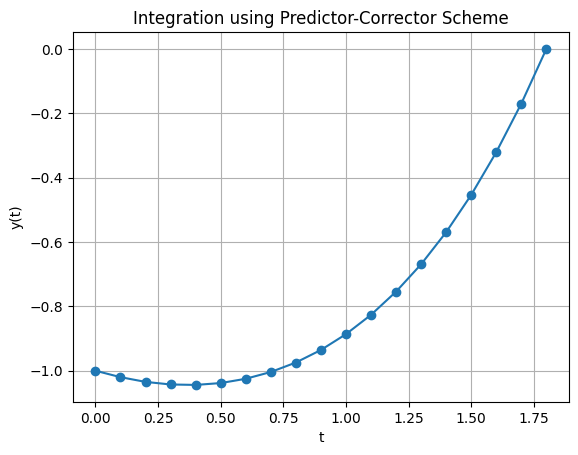

In [3]:
# Given data
t_values = np.arange(0.0, 1.9, 0.1)
f_values = np.array([1.00, 0.84, 0.78, 0.73, 0.68, 0.65, 0.61, 0.58, 0.55, 0.53, 0.50, 0.48, 0.45, 0.43, 0.41, 0.39, 0.37, 0.35, 0.33])

def dydt(t, y, f_t):
    return y / (y * np.cos(t / 3) + alpha * f_t) + t

h = 0.1
y = [-1]  # Initial value

# Predictor-Corrector Scheme
for j, t in enumerate(t_values[:-1]):
    # Predictor
    y_star = y[-1] + h * dydt(t, y[-1], f_values[j])
    # Corrector
    y_next = y[-1] + (h/2) * (dydt(t, y[-1], f_values[j]) + dydt(t+h, y_star, f_values[j+1]))
    y.append(y_next)
    
# Plotting
plt.plot(t_values, y, '-o')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Integration using Predictor-Corrector Scheme')
plt.grid(True)
plt.show()


In [4]:
# Estimate the minimum value of y
min_value = min(y)
index = y.index(min_value)
t_min = t_values[index]

print(f"The minimum value of y is approximately {min_value:.4f} at t = {t_min:.1f}")

The minimum value of y is approximately -1.0441 at t = 0.4
